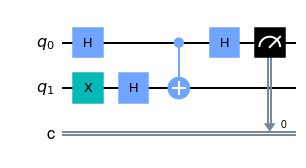

In [12]:
#from qiskit import QuantumCircuit, Aer
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
#circuit.barrier()

# blackbox Uf function
circuit.cx(0,1)
#circuit.barrier()

circuit.h(0)
#circuit.barrier()
circuit.measure(0,0)
circuit.draw('mpl')

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(circuit, shots=1).result()
counts = result.get_counts()
print(counts)

{'1': 1}


In [10]:
# Real quantum computer
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()}; qubits = {qubit_count} job = {backend.status().pending_jobs}")


ibmqfactory.load_account:WARNING:2021-10-06 23:47:07,213: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator; qubits = simulated job = 0
ibmq_armonk; qubits = 1 job = 0
ibmq_santiago; qubits = 5 job = 355
ibmq_bogota; qubits = 5 job = 1
ibmq_lima; qubits = 5 job = 6
ibmq_belem; qubits = 5 job = 5
ibmq_quito; qubits = 5 job = 2
simulator_statevector; qubits = simulated job = 0
simulator_mps; qubits = simulated job = 0
simulator_extended_stabilizer; qubits = simulated job = 0
simulator_stabilizer; qubits = simulated job = 0
ibmq_manila; qubits = 5 job = 78


In [13]:
qcomp = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=qcomp)
# cannot run with circuit.barrier() added

In [ ]:
job_monitor(job)

Job Status: job is queued (3)